# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/test.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
counter = 0
setcounter = 1



## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lats,lngs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name


    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities



['port lavaca',
 'lillooet',
 'hithadhoo',
 'jamestown',
 'port macquarie',
 'constitucion',
 'keetmanshoop',
 'klaksvik',
 'hermanus',
 'rikitea',
 'camana',
 'sentyabrskiy',
 'ostrovnoy',
 'barrow',
 'san quintin',
 'saskylakh',
 'geraldton',
 'saryshagan',
 'hobart',
 'tuatapere',
 'hasaki',
 'qaanaaq',
 'terrace',
 'vaini',
 'lata',
 'souillac',
 'yellowknife',
 'mount isa',
 'razole',
 'eldikan',
 'hendijan',
 'lorengau',
 'saint-philippe',
 'atuona',
 'somerset',
 'kruisfontein',
 'isangel',
 'tiksi',
 'thompson',
 'lianzhou',
 'sri aman',
 'mahebourg',
 'faanui',
 'nikolskoye',
 'galle',
 'tuktoyaktuk',
 'sharjah',
 'busselton',
 'vaitupu',
 'ushuaia',
 'vardo',
 'grand gaube',
 'srandakan',
 'adre',
 'longyearbyen',
 'punta arenas',
 'markova',
 'khatanga',
 'norman wells',
 'butaritari',
 'gangotri',
 'havoysund',
 'po',
 'college',
 'chinhoyi',
 'luwuk',
 'kavieng',
 'jabiru',
 'ishigaki',
 'new norfolk',
 'bambous virieux',
 'carnarvon',
 'raudeberg',
 'banjar',
 'albany',
 

In [4]:
len(cities)

113

In [5]:
# set lists for the dataframe
ncities=500
citydf = []
cloudy = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
i = 0
#setcounter = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        #citydf.append(response["name"])
        cloudy.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        city_record = response["name"]
        print(f"Processing Record {i} | {city_record}")
        print(f'{query_url}{city.replace(" ","&")}')
        #counter +=1
        #Increase counter by one 
        if i < ncities:
              #i = 1
              #setcounter += 1
              citydf.append(city)
              i += 1
        else:
              citydf.append(city)
        print(f"Processing Record {counter} of Set {setcounter} | {city}")
        
        #Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
    #If no record found "skip" to next call
    except:
              print("City not found. Skipping...")


Processing Record 0 | Port
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=port&lavaca
Processing Record 0 of Set 1 | port lavaca
Processing Record 1 | Lillooet
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=lillooet
Processing Record 0 of Set 1 | lillooet
Processing Record 2 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=hithadhoo
Processing Record 0 of Set 1 | hithadhoo
Processing Record 3 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=jamestown
Processing Record 0 of Set 1 | jamestown
Processing Record 4 | Port
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=port&macquarie
Processing Record 0 of Set 1 | port macquarie
Processing Record 5 | Constitucion
http://api.openweathermap.org/data

City not found. Skipping...
Processing Record 44 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=ushuaia
Processing Record 0 of Set 1 | ushuaia
Processing Record 45 | Vardo
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=vardo
Processing Record 0 of Set 1 | vardo
Processing Record 46 | Grand
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=grand&gaube
Processing Record 0 of Set 1 | grand gaube
Processing Record 47 | Srandakan
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=srandakan
Processing Record 0 of Set 1 | srandakan
Processing Record 48 | Adre
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=adre
Processing Record 0 of Set 1 | adre
Processing Record 49 | Longyearbyen
http://api.openweathermap.org/data

Processing Record 88 | Southbridge
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=southbridge
Processing Record 0 of Set 1 | southbridge
Processing Record 89 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=taoudenni
Processing Record 0 of Set 1 | taoudenni
Processing Record 90 | Pevek
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=pevek
Processing Record 0 of Set 1 | pevek
Processing Record 91 | Serendah
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=serendah
Processing Record 0 of Set 1 | serendah
Processing Record 92 | Asau
http://api.openweathermap.org/data/2.5/weather?appid=2830251d1199e7399ee3b3369f4fdc88&units=imperial&q=asau
Processing Record 0 of Set 1 | asau
Processing Record 93 | Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=2

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a dictionary for establishing dataframe
cityweather = {
    "City":citydf,
    "Cloudy":cloudy,
    "Country":countries,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

cityweather

{'City': ['port lavaca',
  'lillooet',
  'hithadhoo',
  'jamestown',
  'port macquarie',
  'constitucion',
  'keetmanshoop',
  'klaksvik',
  'hermanus',
  'rikitea',
  'camana',
  'ostrovnoy',
  'barrow',
  'san quintin',
  'saskylakh',
  'geraldton',
  'hobart',
  'tuatapere',
  'hasaki',
  'qaanaaq',
  'terrace',
  'vaini',
  'lata',
  'souillac',
  'yellowknife',
  'mount isa',
  'razole',
  'lorengau',
  'saint-philippe',
  'atuona',
  'somerset',
  'kruisfontein',
  'isangel',
  'tiksi',
  'thompson',
  'lianzhou',
  'sri aman',
  'mahebourg',
  'faanui',
  'nikolskoye',
  'galle',
  'tuktoyaktuk',
  'sharjah',
  'busselton',
  'ushuaia',
  'vardo',
  'grand gaube',
  'srandakan',
  'adre',
  'longyearbyen',
  'punta arenas',
  'markova',
  'khatanga',
  'norman wells',
  'butaritari',
  'havoysund',
  'college',
  'chinhoyi',
  'luwuk',
  'kavieng',
  'ishigaki',
  'new norfolk',
  'bambous virieux',
  'carnarvon',
  'raudeberg',
  'banjar',
  'albany',
  'port alfred',
  'beira'

In [7]:
weather_df = pd.DataFrame(cityweather)
weather_df

,City,Cloudy,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port lavaca,100,CD,1579927006,81,-7.03,29.76,74.53,10.29
1,lillooet,20,CA,1579927007,75,50.69,-121.94,44.60,20.80
2,hithadhoo,83,MV,1579926821,80,-0.60,73.08,82.90,15.73
3,jamestown,90,US,1579926728,93,42.10,-79.24,44.01,8.05
4,port macquarie,100,CD,1579927010,81,-7.03,29.76,74.53,10.29
...,...,...,...,...,...,...,...,...,...
97,bredasdorp,38,ZA,1579927117,94,-34.53,20.04,68.00,2.82
98,abha,40,SA,1579926836,93,18.22,42.51,50.00,5.82
99,george,75,ZA,1579927119,75,-33.96,22.46,64.40,9.17
100,lebu,0,CL,1579927121,70,-37.62,-73.65,55.17,7.07


In [8]:
weather_df.to_csv('../output_data/test.csv')

# Display data frame head 
weather_df.head()

,City,Cloudy,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port lavaca,100,CD,1579927006,81,-7.03,29.76,74.53,10.29
1,lillooet,20,CA,1579927007,75,50.69,-121.94,44.60,20.80
2,hithadhoo,83,MV,1579926821,80,-0.60,73.08,82.90,15.73
3,jamestown,90,US,1579926728,93,42.10,-79.24,44.01,8.05
4,port macquarie,100,CD,1579927010,81,-7.03,29.76,74.53,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

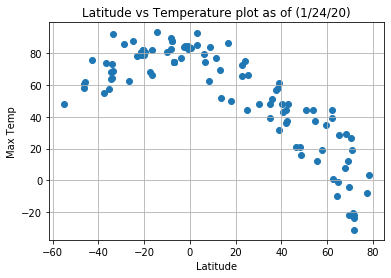

In [9]:
# Graph plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.title("Latitude vs Temperature plot as of (1/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("../output_data/LatvsMaxTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

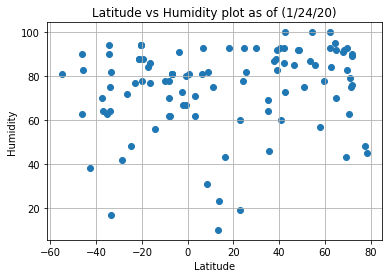

In [10]:
# Graph plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("Latitude vs Humidity plot as of (1/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("../output_data/LatvsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

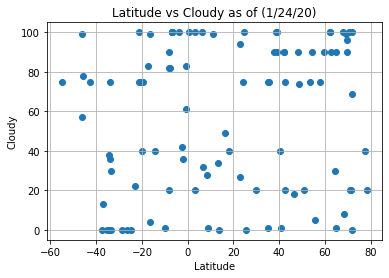

In [11]:
# Graph plot
plt.scatter(weather_df["Lat"],weather_df["Cloudy"])
plt.title("Latitude vs Cloudy as of (1/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudy")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("../output_data/LatvsCloudy.png")
plt.show()


#### Latitude vs. Wind Speed Plot

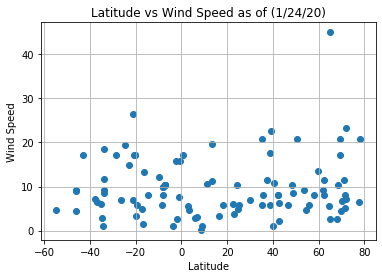

In [12]:
# Graph plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("Latitude vs Wind Speed as of (1/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("../output_data/LatvsWindSpeed.png")
plt.show()


## Linear Regression

In [13]:
cities = pd.read_csv("../output_data/test.csv")
cities.head()



,Unnamed: 0,City,Cloudy,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,port lavaca,100,CD,1579927006,81,-7.03,29.76,74.53,10.29
1,1,lillooet,20,CA,1579927007,75,50.69,-121.94,44.60,20.80
2,2,hithadhoo,83,MV,1579926821,80,-0.60,73.08,82.90,15.73
3,3,jamestown,90,US,1579926728,93,42.10,-79.24,44.01,8.05
4,4,port macquarie,100,CD,1579927010,81,-7.03,29.76,74.53,10.29


In [14]:
northernhemi = cities.loc[cities["Lat"] >= 0.0]
northernhemi.reset_index(inplace=True)

northernhemi

,index,Unnamed: 0,City,Cloudy,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1,1,lillooet,20,CA,1579927007,75,50.69,-121.94,44.60,20.80
1,3,3,jamestown,90,US,1579926728,93,42.10,-79.24,44.01,8.05
2,7,7,klaksvik,100,FO,1579927014,100,62.23,-6.59,44.60,11.41
3,11,11,ostrovnoy,100,RU,1579926828,91,68.05,39.51,7.65,2.55
4,12,12,barrow,20,US,1579926732,75,71.29,-156.79,-20.20,8.05
5,13,13,san quintin,34,ML,1579927021,10,13.30,-4.90,69.42,11.27
6,14,14,saskylakh,100,RU,1579926827,90,71.92,114.08,-23.57,23.33
7,18,18,hasaki,75,JP,1579926450,46,35.73,140.83,51.01,8.05
8,19,19,qaanaaq,40,GL,1579926809,48,77.48,-69.36,-8.14,6.51
9,20,20,terrace,90,CA,1579927012,100,54.52,-128.60,37.40,4.70


In [15]:
southernhemi = cities.loc[cities["Lat"] <= 0.0]
southernhemi.reset_index(inplace=True)

southernhemi

,index,Unnamed: 0,City,Cloudy,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,0,port lavaca,100,CD,1579927006,81,-7.03,29.76,74.53,10.29
1,2,2,hithadhoo,83,MV,1579926821,80,-0.60,73.08,82.90,15.73
2,4,4,port macquarie,100,CD,1579927010,81,-7.03,29.76,74.53,10.29
3,5,5,constitucion,0,CL,1579926451,63,-35.33,-72.42,57.33,5.99
4,6,6,keetmanshoop,0,NaN,1579927013,72,-26.58,18.13,62.60,6.93
5,8,8,hermanus,0,ZA,1579926731,90,-34.42,19.23,64.00,1.01
6,9,9,rikitea,22,PF,1579927016,77,-23.12,-134.97,78.35,14.85
7,10,10,camana,99,PE,1579926439,86,-16.62,-72.71,66.43,1.61
8,15,15,geraldton,0,AU,1579927023,42,-28.77,114.60,86.00,17.22
9,16,16,hobart,75,AU,1579927024,38,-42.88,147.33,75.99,17.22


In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy.stats import linregress
def plotLinearRegression(xdata,ydata,xlbl,ylbl,fignum):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    fit = slope * xdata + intercept
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,fit,"r-")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"../output_data/LinearRegression{fignum}.png")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8832021509569472


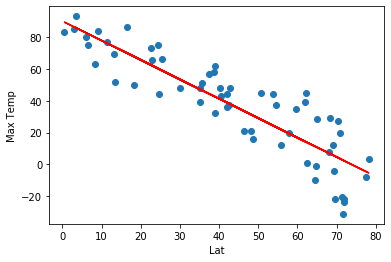

In [17]:

xlbl = "Lat"
ylbl = "Max Temp"
plotLinearRegression(northernhemi[xlbl],northernhemi[ylbl],xlbl,ylbl,1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6581865578276659


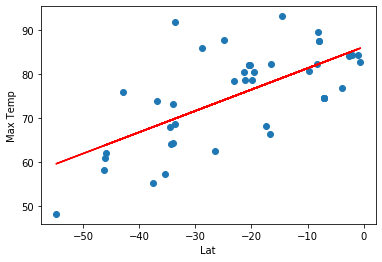

In [18]:
xlbl = "Lat"
ylbl = "Max Temp"
plotLinearRegression(southernhemi[xlbl],southernhemi[ylbl],xlbl,ylbl,2)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25015099695457566


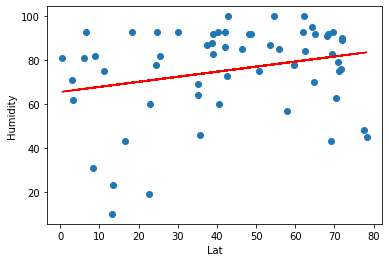

In [19]:
xlbl = "Lat"
ylbl = "Humidity"
plotLinearRegression(northernhemi[xlbl],northernhemi[ylbl],xlbl,ylbl,3)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14907474495036713


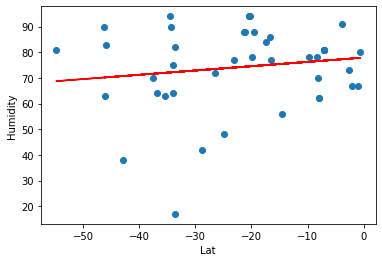

In [20]:
xlbl = "Lat"
ylbl = "Humidity"
plotLinearRegression(southernhemi[xlbl],southernhemi[ylbl],xlbl,ylbl,4)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0678666002533986


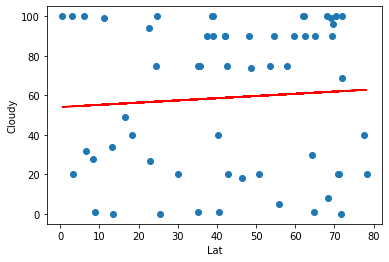

In [21]:
xlbl = "Lat"
ylbl = "Cloudy"
plotLinearRegression(northernhemi[xlbl],northernhemi[ylbl],xlbl,ylbl,5)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.265473848258312


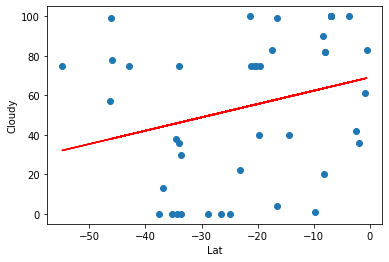

In [22]:
xlbl = "Lat"
ylbl = "Cloudy"
plotLinearRegression(southernhemi[xlbl],southernhemi[ylbl],xlbl,ylbl,6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24260600464307047


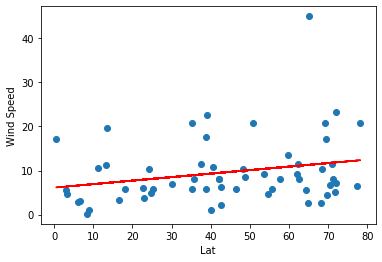

In [23]:
xlbl = "Lat"
ylbl = "Wind Speed"
plotLinearRegression(northernhemi[xlbl],northernhemi[ylbl],xlbl,ylbl,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05203678993762995


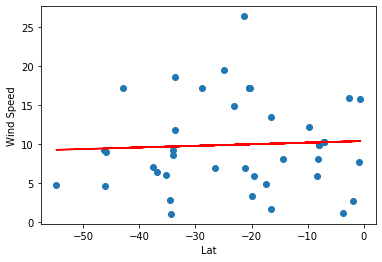

In [24]:
xlbl = "Lat"
ylbl = "Wind Speed"
plotLinearRegression(southernhemi[xlbl],southernhemi[ylbl],xlbl,ylbl,8)